# Linear Regression
This tutorial will teach you how to implement and solve a regression problem using python.

#### Additional references:

http://ufldl.stanford.edu/tutorial/supervised/LinearRegression/ $\hspace{15cm}$
http://cs229.stanford.edu/notes/cs229-notes1.pdf
$\hspace{25cm}$

Such as classification, regression is a fundamental concept in machine learning. 
While classification is about assigning the correct class $c$ to a data-point $\vec x$, regression is about fitting a function $f(\vec x) = \vec y + \epsilon$ to a set of $D$ tuples $\left\lbrace(\vec x_1,\vec y_1),\cdots,(\vec x_D,\vec y_D)\right\rbrace$ such that the error term $\epsilon$ gets as close as possible to zero for all tuples. In other words we want to learn a function that describes the data best! Here, $\vec x$ and $\vec y$ are vectors, and $f(\vec x)$ is a parameterized function. In order to formulate this task as an optimization problem we need to choose an appropriate loss/error function that accounts for the fact that the single terms can be positive or negative and thus may cancel out each other. The most common choice is to minimize the Mean Squared Error (MSE), which leads to the following optimization problem

$minimize \, \frac{1}{D}\sum_d^D \epsilon^2_d = minimize \, \frac{1}{D}\sum_d^D (f(\vec x_d) - \vec y_d)^2  \,.$

Note that there are other loss/error functions see https://en.wikipedia.org/wiki/Linear_regression.
Although  mathematically equivalent it is better to optimize the MSE instead of the sum of squared errors to avoid numerical problems when having a large number of data-points.

Let us begin with an easy example where $x$ and $y$ are scalars and where $f(x) = ax+b$ is a linear function with slope $a$ and interception $b$. In this case our optimization problem becomes

$minimize \, \frac{1}{D}\sum_d^{D}\left(a x_{d}+b-y_{d}\right)^2 = minimize \, \left\langle \left(a x_{d}+b-y_{d}\right)^2 \right\rangle_d\, ,$

where $\left\langle x_d \right\rangle_d$ denotes simply the average of $x_d$. 
$\hspace{25cm}$

#### Exercise 1)  - Analytical solution
- Your first exercise is to find the optimal parameters $a^*$ and $b^*$ analytically for which the optimization problem given above is minimal.

How do you find the minimum of a function with respect to a variable?(Hint: Curve sketching/Kurvendiskussion)
But you have two variables (Hint: linear system of equations/ Lineares Gleichungssystem)

Do you have an idea why it is good to use a quadratic error function? 

What would be the problem is we skip the square and use the absolute value instead?

#### Exercise 2)  - Creating data and plotting a line

We now want to implement our solution in python and here comes the toy example data we use.

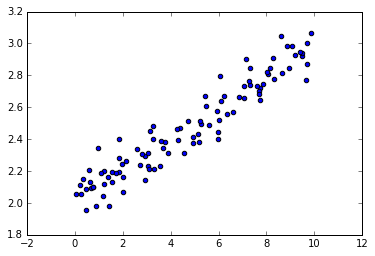

In [204]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
x = np.random.rand(100,1)*10.0
y = 0.1*x+2.0+np.random.randn(100,1)*0.1

plt.scatter(x,y)
plt.show()

- Now write a function 'plotLine(a,b,min_x=0,max_x=10)' that plots a line with slope $a$ and interception $b$ between $min_x<=x<=max_x$ into the scatter plot.

- Can you guess by looking to data and python code how the optimal line and thus the optimal parameters $a^*$,$b^*$ look like? Can you identify the parameters $a^*$,$b^*$ and the error term $\epsilon$ in the code? Plot the corresponding line using your function. (Note that we can only guess the parameter because it is a 2D artificially constructed problem!)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotLine(a,b,min_x=0.0,max_x=10.0):
    # Your code

plt.scatter(x,y)
a_guess = 0
b_guess = 0
plotLine(a_guess,b_guess)
plt.show()

#### Exercise 3)  - 1D closed form solution

- Now implement a function that takes two numpy arrays x,y as arguments and returns the optimal parameters $a^*$,$b^*$. Print the result and also  plot the resulting line using plotLine(a*,b*).

In [ ]:
def linear_regression(x,y):
    # Your code

a_star,b_star = linear_regression(x,y)
print a_star,b_star
plt.scatter(x,y)
plotLine(a_star,b_star)
plt.show()

- Explain why the resulting line does not exactly fit our guess!

- Play around with the number of data-points e.g. (10,1000,10000) and with the noise level (0.001,0.01,1.0), to get a feeling of how they influence the solution

#### Exercise 4)  - 1D gradient descent

Sometimes you do not have all data at once (think of an online learning problem where the data continuously comes from an sensor) or your model does not provide a closed form solution such as multi-layer-perceptrons. This is the case where gradient descent comes into play. 

You have already calculated the partial derivatives w.r.t the parameters a,b, which points in the direction of steepest ascent of our error function. So to minimize the function we continuously update a and b by the negative partial derivatives multiplied by some step size/learning rate.

- Write a function linear_regression_gradient_decent(x,y,learning_rate=0.05,iterations=1000): that updates a,b by the using gradient descent for a fix number of iterations. Keep in mind that the partial derivatives have to be recalculated once a,b, changed. Print the results, plot the estimated line using plotLine(a_star,b_star) and compare the results to the closed form solution. Initilize $a$ and $b$ simply to zero.

- Play around with the learning rate(0.1,0.01) and the number of iterations (10,100,10000).

In [ ]:
def linear_regression_gradient_decent(x,y,learning_rate=0.05,iterations=1000):
    # Your code

a_star,b_star = linear_regression_gradient_decent(x,y)
plt.scatter(x,y)
plotLine(a_star,b_star)
print a_star,b_star
plt.show()

#### Exercise 5)  - Optional - Getting multidimensional

If you are familiar with matrix vector calculus you can implement the multidimensional least squares solver! A valuable trick is to integrate the bias term $b$ into the weight matrix $A$ by adding instead a dimension to the data that is constantly one for all data points.

The least squares problem for multi input and output dimensions is given by:
$\hspace{25cm}$

$minimize \left\langle \sum_i^{N} \sum_j^M \left(a_{ij} x_{di}+b_j-y_{dj}\right)^2 \right\rangle_d = minimize \left\langle \sum_i^{N+1} \sum_j^M \left(a_{ij} x_{di}-y_{dj}\right)^2 \right\rangle_d = minimize \left\langle (  \vec x {\bf A} -\vec y)^2\right\rangle_d$, where $\vec x$, $\vec y$ are vectors, $\bf A$ denotes a matrix and the bias has been replaced by an additional input dimension that is constantly one.
$\hspace{25cm}$

- Calculate the partial derivative w.r.t. the matrix $\bf A$ in matrix calculus and solve the equation for $\bf A$.

- Now implement the function linear_regression_multidimensional(x,y) that extends $x$ by a dimension that is constantly one, solves the regression problem and returns weight matrix $\bf A$ and bias $b$. 

Hint: You need to extract the bias $b$, which is the last column of the weight matrix if you added the constant dimension to the end of $x$.
To solve a set of linear equations use np.linalg.solve() or to get the inverse of a matrix use np.linalg.pinv().
 
- Check you results with the 1D example as given before.

In [ ]:
def linear_regression_multidimensional(x,y):
    # Your code

a_star,b_star = linear_regression_multidimensional(x,y)
plt.scatter(x,y)
plotLine(a_star[0],b_star)
print a_star,b_star
plt.show()

#### Exercise 6)  - Non linear data - expansion 

Now that you have understood the concept of a linear regression, we want to continues doing something more interesting.

Let's get some non linear data!

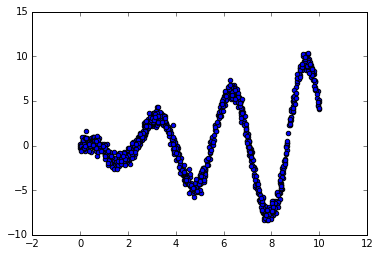

In [215]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.rand(1000)*10.0
y = x*np.cos(2*x)+np.random.randn(1000)*0.5
plt.scatter(x,y)
plt.show()

Although this data is non-linear it can still be handled using a linear regression together with a polynomial expansion of the data. Such that the function we want to fit becomes:

$f(x) = a_0 + a_1*x+a_2*x^2+a_3*x^3+ \cdots$

Here a_0 is now our bias.

- Write a function plot_polynomial(A,b,min_x=0.0,max_x=10.0) that plots the $f(x)$ into the scatter plot.

In [210]:
def plot_polynomial(A,b,min_x=0.0,max_x=10.0):
    # Your code

###  If you solved exercise 5 

- Write an expansion function expand(x,degree) that returns x expanded by degree 'degree' e.g. [x,x^2+,x^3,...].

In [211]:
def expaned(x, degree):
    # Your code

- Expand the data by 15, fit the model using linear_regression_multidimensional(x,y) and plot the results again.

- Play around with different degrees 1,3,5,10,15!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Your code

plt.scatter(x,y)
plot_polynomial(A,b)
print A,b
plt.show()



### If  you did not  solve exercise 5 

- If you have not solved exercise 5 use the function np.polyfit(x,y,degree) to fit a polynomial of degree 'degree' to the data. 

Important np.polyfit(x,y,degree) returns an array of length degree+1 in reverse order of the parameters, meaning that it starts with the highest degree. For example np.polyfit(x,y,3) returns $[a_3,a_2,a_1,a_0] = [a_3,a_2,a_1,b]$. So you have to extract $b$ and $A$ and reverse $A$ use plot_polynomial(A,b).

In [ ]:
# Your code
plt.scatter(x,y)
plot_polynomial(A,b)
print A,b

plt.show()

Where you could go from here: 

- Use a library on real world dat for example kaggle.

- Implement gradient decent for multi dimensional data!

- Extent the model to a Multi-layer-perceptrons!

- Other machine learning algorithms!